In [148]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime

* Setting up ability to import functions from src folder

In [149]:
sys.path.insert(
    0, "/home/cameronwills/ddimil12/projects/midterm/gtd_exploration")

In [150]:
from src import clean_data as cd

* Reads in the full_data csv
* Sets low_memory to false to better interpret the values in the columns, since there is a lot of mixed data types in the csv

In [151]:
world_df = pd.read_csv("../data/full_data.csv", index_col=0, low_memory=False)

* Makes a copy of the original df, with only the United States data

In [152]:
usa_df = world_df[world_df["country_txt"] == "United States"].copy()

* Creates a new column 'date' that is of data type datetime

In [153]:
usa_df["date"] = cd.create_date_column(usa_df)

* Top 5 terrorist groups that attack the US

In [154]:
top_5_groups = usa_df.groupby("gname")["gname"].count().sort_values(ascending=False).iloc[:5]

<Axes: title={'center': 'Top 5 groups that attack the most (1970 - 2020)'}, xlabel='count', ylabel='group name'>

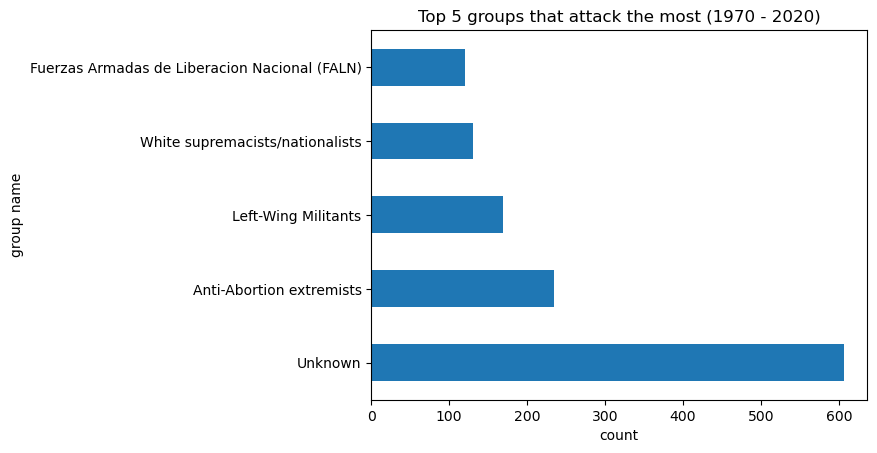

In [155]:
top_5_groups.plot.barh(title="Top 5 groups that attack the most (1970 - 2020)",
                       ylabel="group name", xlabel="count")

* Timeline for each group

In [156]:
groups = top_5_groups.index.values
query = usa_df["gname"].isin(groups)
top_5_df = usa_df[query]
top_5_timeline = top_5_df.groupby(["gname", "year"])["year"].count()

In [157]:
colors = plt.get_cmap("tab10").colors

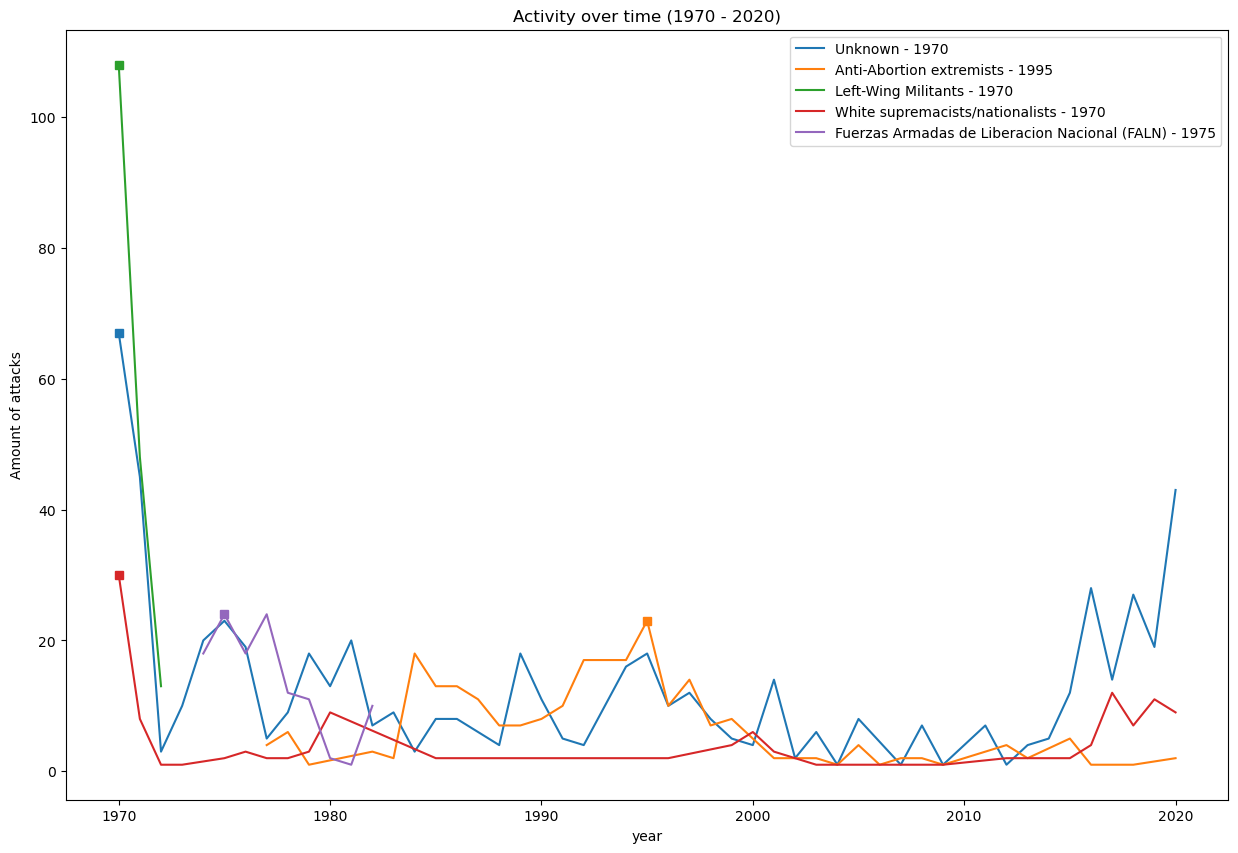

In [158]:
for idx, group in enumerate(groups):
    most_active_year = top_5_timeline[group].idxmax()
    amount_for_most = top_5_timeline[group][most_active_year]
    plt.plot(most_active_year, amount_for_most, marker="s", color=colors[idx])
    top_5_timeline[group].plot.line(legend=True, label=f"{group} - {most_active_year}", 
                                    figsize=(15, 10), title="Activity over time (1970 - 2020)", 
                                    ylabel="Amount of attacks", color=colors[idx])
  

* Most common attack from each group

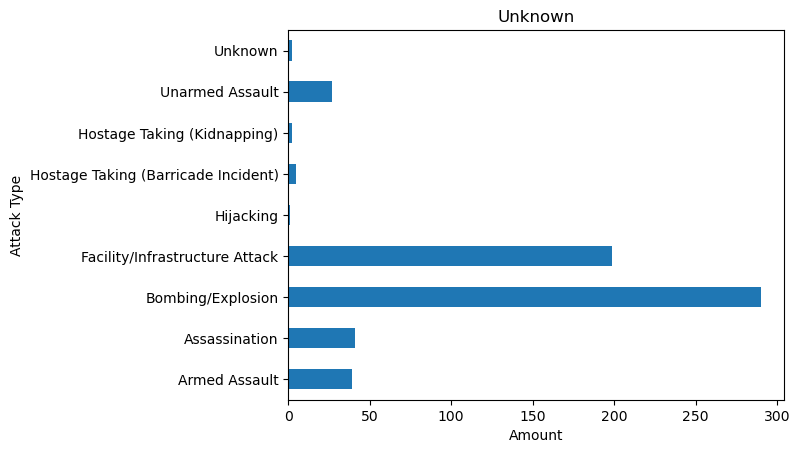

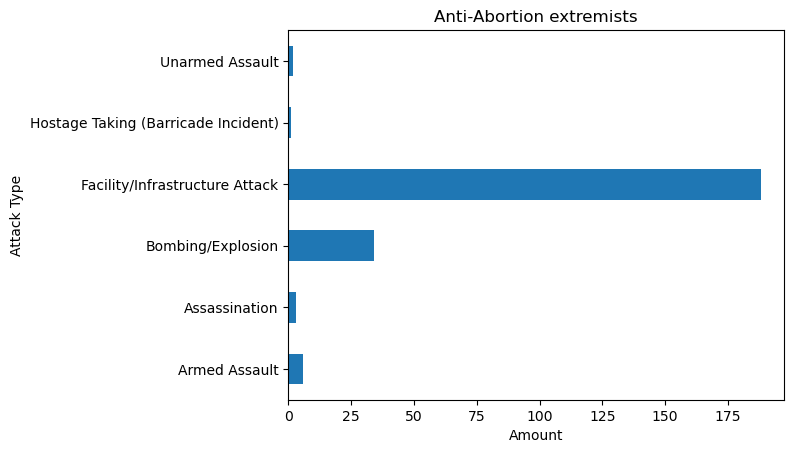

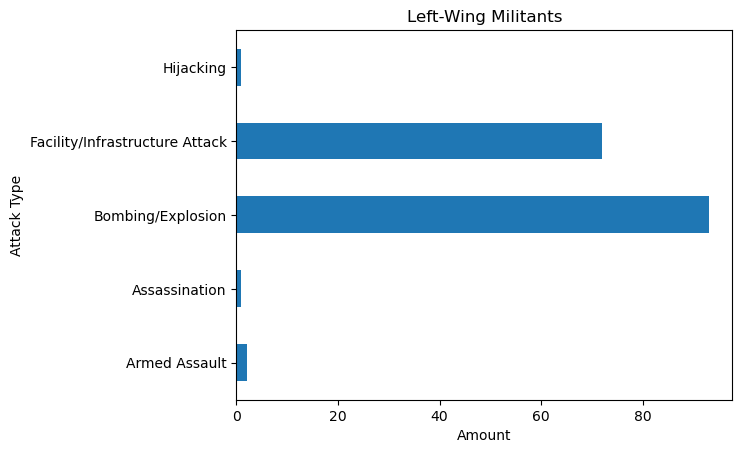

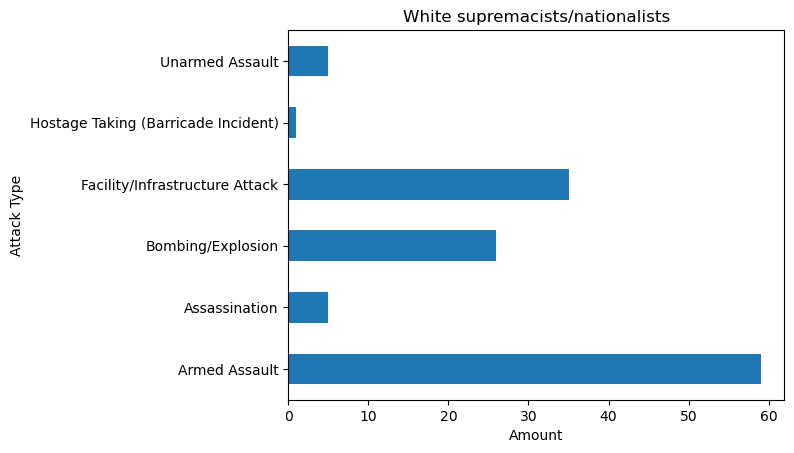

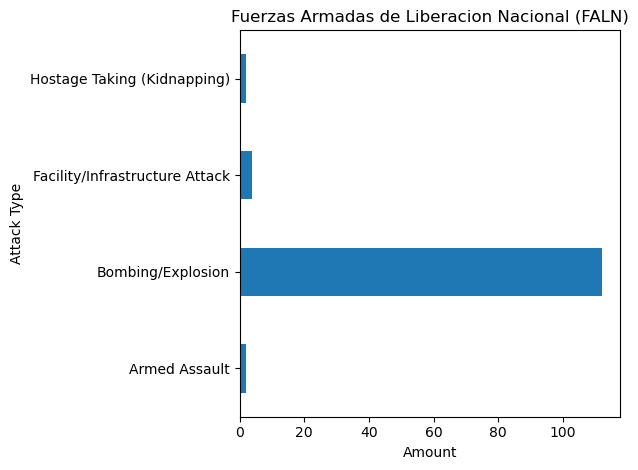

In [297]:
attack_types = top_5_df["attacktype1_txt"].unique()
types_per_group = top_5_df.groupby(["gname", "attacktype1_txt"]).size()
for idx, group in enumerate(groups):
    fig, ax = plt.subplots()
    types_per_group[group].plot.barh(ax=ax, title=group, ylabel="Attack Type", xlabel="Amount")
plt.tight_layout()

* Most common attack in general

<Axes: title={'center': 'All groups'}, xlabel='Amount', ylabel='Attack Type'>

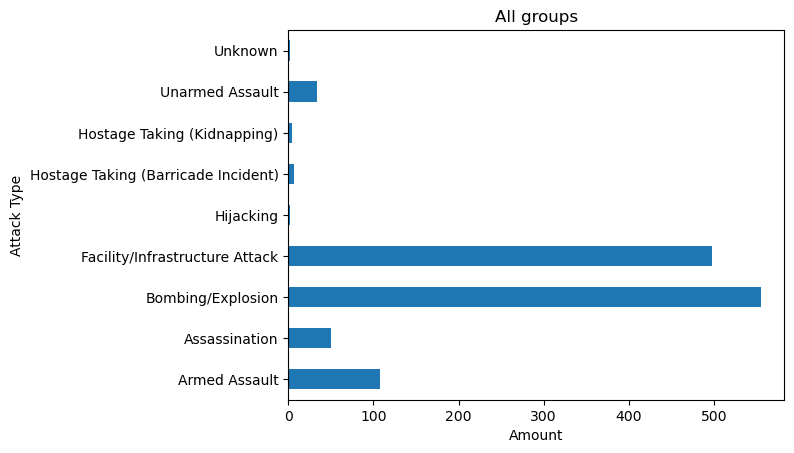

In [300]:
top_5_df.groupby("attacktype1_txt").size().plot.barh(title="All groups", ylabel="Attack Type",
                                                     xlabel="Amount")

* Top 10 attacked targets

In [318]:
top_5_df.groupby(
    ["targtype1_txt", "targsubtype1_txt"]).size().sort_values(ascending=False)[:10]

targtype1_txt                   targsubtype1_txt                               
Abortion Related                Clinics                                            222
Religious Figures/Institutions  Place of Worship                                   109
Business                        Bank/Commerce                                       96
Government (General)            Government Building/Facility/Office                 91
Business                        Retail/Grocery/Bakery                               73
Private Citizens & Property     Race/Ethnicity Identified                           47
Educational Institution         School/University/Educational Building              40
Military                        Military Barracks/Base/Headquarters/Checkpost       39
                                Military Recruiting Station/Academy                 32
Police                          Police Building (headquarters, station, school)     28
dtype: int64